<a href="https://colab.research.google.com/github/jacr2006/keras/blob/master/facenet_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Verification using FACENET pretrained model and K-means clustering

In [ ]:
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
from sklearn.cluster import KMeans
from scipy import spatial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH_DRIVE = '/content/drive/MyDrive/Colab Notebooks/'

In [ ]:
# train dataset
images = []

files_path = PATH_DRIVE+"celebrity_faces/train"
_files = os.listdir(files_path)

for _classes in _files:
  _images = os.listdir(files_path+'/'+_classes)
  print(_classes)
  for _f in _images:
    _path = files_path+'/'+_classes+'/'+_f
    images.append(_path)
    print(_path)

ben_afflek
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpcsvkmeuaeccjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpwwwallposterscomimagesPostersPFjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebr

In [ ]:
# validation dataset
images_val = []

files_path = PATH_DRIVE+"celebrity_faces/val"
_files = os.listdir(files_path)

for _classes in _files:
  _images = os.listdir(files_path+'/'+_classes)
  for _f in _images:
    _path = files_path+'/'+_classes+'/'+_f
    images_val.append(_path)
    print(_path)

/content/drive/MyDrive/Colab Notebooks/celebrity_faces/val/elton_john/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTEODAOTcxNjcMjczMjkzjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnemmysperformancewatchnowjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnstillstandingbrooklynnewyearsjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnsupportsbrucejennerstransitiontowomanjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/val/elton_john/httpcdnlyricssongonlyricsnetwpcontentuploadsEltonJohnDiscographyCDreleasesjpg.jpg
/content/drive/MyDrive/Colab Notebooks/celebrity_faces/val/jerry_seinfeld/httpcdncdnjustjaredcomwpcontentuploadsheadlinesjerryseinfeldmakesbrianwilliamsjokejpg.jpg
/content/drive/MyDrive/Colab Notebooks

In [ ]:
# pre-trained model (https://github.com/nyoki-mtl/keras-facenet)
model = tf.keras.models.load_model(PATH_DRIVE+'facenet_keras.h5')

print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [ ]:
IMG_WIDTH = 160
IMG_HEIGHT = 160
IMG_CHANNEL = 3

def process_image(_filename):
  _img=cv2.imread( _filename )
  _grayImg = cv2.cvtColor( _img, cv2.COLOR_BGR2GRAY )
  
  # simple Haarcascade face detector
  detector = cv2.CascadeClassifier(PATH_DRIVE+'lbpcascade_frontalface.xml')
  _rects = detector.detectMultiScale(_grayImg, scaleFactor=1.05,  minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

  # only one face/rectangle per picture
  for (x, y, w, h) in _rects:
    cv2.rectangle(_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

  #
  _cropImg = _img[y:y+h, x:x+w]
  _rezImg  = cv2.resize( _cropImg, ( IMG_WIDTH, IMG_HEIGHT ) )
  #cv2_imshow(rezImg)

  _rezImg = _rezImg.astype('float32')
  mean, std = _rezImg.mean(), _rezImg.std()
  _rezImg = (_rezImg - mean) / std

  return _cropImg, _rezImg


In [ ]:
# processing train set image 
img = []
for i in range( len(images) ):
  try:
    img.append( process_image(images[i])[1] )
  except:
    print("Fail in image processing:"+images[i])

img = np.array( img )
img.shape

Fail in image processing:/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpcsvkmeuaeccjpg.jpg
Fail in image processing:/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg
Fail in image processing:/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
Fail in image processing:/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/madonna/httpssmediacacheakpinimgcomxafafedebcbjpg.jpg
Fail in image processing:/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/madonna/httpuploadwikimediaorgwikipediacommonsthumbaMadonnaRotterdamjpgpxMadonnaRotterdamjpg.jpg
Fail in image processing:/content/drive/MyDrive/Colab Notebooks/celebrity_faces/train/madonna/httpsuploadwikimediaorgwikipediacommonsMadonnathAnnualGoldenGlobesAwardscroppedjpg.jpg
Fail in image processing:/content/drive/MyDrive/Colab Notebooks/celebrity_fa

(76, 160, 160, 3)

In [ ]:
# inference using pre-trained model (wihtout fine tunning)
y_train= model.predict(img)
y_train.shape

(76, 128)

In [ ]:
# clustering of classes
num_classes = len(classes)
features_kmean = KMeans(n_clusters=num_classes, random_state=0).fit(y_train)
features_kmean.cluster_centers_.shape

(5, 128)

In [ ]:
# distance functions
def euclid_dis(x,y):
  sum_square = K.sum(K.square(x-y), axis=1, keepdims=True)
  return K.sqrt(K.maximum(sum_square, K.epsilon()))

def cos_distance(p1,p2):
  return spatial.distance.cosine(p1, p2)

elton_john


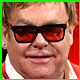

nearest cluster: 
tf.Tensor([[8.1211]], shape=(1, 1), dtype=float32)
tf.Tensor([[15.657098]], shape=(1, 1), dtype=float32)
tf.Tensor([[15.52243]], shape=(1, 1), dtype=float32)
tf.Tensor([[16.27156]], shape=(1, 1), dtype=float32)
tf.Tensor([[16.068813]], shape=(1, 1), dtype=float32)


In [ ]:
# comparison between image features (128D vector) and clusters list
sample = 2
pic, img_val = process_image(images_val[sample])
img_val = img_val.reshape( 1, img_val.shape[0], img_val.shape[1], img_val.shape[2] )

# inference
y_val= model.predict(img_val)
print(images_val[sample].split('/')[-2])

#
cv2_imshow(pic)

# comparison
print("nearest cluster: ")
for s in range(num_classes):
  print( euclid_dis( y_val, features_kmean.cluster_centers_[s] ) )

In [ ]:
# Path model
modellite = PATH_DRIVE+'facenet_keras.tflite'

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open(modellite, 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpq1nb8xa1/assets
